In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
from jiwer import wer

In [1]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7


**ADDING CUSTOM YOUR**

In [7]:
import os
import pandas as pd
from gtts import gTTS
from tqdm import tqdm

# Define output directory
output_dir = "/kaggle/working/custom_wavs/"
os.makedirs(output_dir, exist_ok=True)

# Generate 1000+ daily life sentences (You can expand this list)
daily_sentences = [
    "Hello! How are you?", "Good morning!", "Good night!", "What's your name?",
    "See you later!", "Where is the nearest hospital?", "How was your day?",
    "I need some help.", "Can you repeat that, please?", "I have a meeting at 5 PM.",
    "Today is Monday.", "Tomorrow is my birthday.", "The train leaves at 9 AM.",
    "This coffee is amazing!", "Let's go shopping.", "How is the weather today?",
    "I will call you later.", "Please give me your address.", "I love programming!",
    "It's time for lunch.", "Have a great weekend!", "See you next week.",
    "Do you like music?", "What is your favorite food?", "Can you play the guitar?",
    "How far is the airport?", "Let's watch a movie.", "Where do you live?",
    "What time does the store open?", "Can you tell me a joke?", "I'm feeling tired."
]

# Add numbers, months, and general phrases
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
greetings = ["Hello!", "Hi!", "Good morning!", "Good afternoon!", "Good evening!", "How are you?", "Nice to meet you!", "See you later!"]

# Generate variations
for month in months:
    daily_sentences.append(f"The current month is {month}.")
for day in days:
    daily_sentences.append(f"Today is {day}.")

# Save metadata
metadata = []

# Convert each sentence to speech and save as WAV file
for i, sentence in tqdm(enumerate(daily_sentences), desc="Generating TTS Data", total=len(daily_sentences)):
    file_name = f"custom_{i}.wav"
    file_path = os.path.join(output_dir, file_name)

    # Convert text to speech
    tts = gTTS(sentence, lang="en")
    tts.save(file_path)

    # Store metadata (filename, sentence)
    metadata.append([file_name, sentence])

# Save metadata as CSV
metadata_df = pd.DataFrame(metadata, columns=["file_path", "transcription"])
metadata_df.to_csv("/kaggle/working/combined_metadata.csv", sep="|", index=False)

print(f"✅ TTS dataset generated with {len(daily_sentences)} sentences!")


Generating TTS Data: 100%|██████████| 50/50 [00:06<00:00,  8.28it/s]

✅ TTS dataset generated with 50 sentences!


In [8]:
import os
import random
import pandas as pd
from gtts import gTTS
from tqdm import tqdm

# Define the output directory for custom data
output_dir = "/kaggle/working/custom_data/"
os.makedirs(output_dir, exist_ok=True)

# 🔥 Generate a Large Set of Sentences
greetings = ["Hello!", "Hi!", "Good morning!", "Good afternoon!", "Good evening!", "How are you?", "Nice to meet you!", "See you later!", "Have a great day!", "Take care!"]
questions = ["Where is the nearest hospital?", "How was your day?", "Can you help me?", "What time does the store open?", "Where do you live?", "Do you like music?", "What's your favorite food?", "Can you play an instrument?", "How far is the airport?", "Let's watch a movie."]
daily_actions = ["I'm going to the grocery store.", "It's time for lunch.", "Let's go for a walk.", "I need to buy some milk.", "I'm heading to the gym.", "Can you pass me the salt?", "I will call you later.", "Please give me your address.", "I love programming!", "The pizza delivery is taking too long."]
weather = ["It's a sunny day today.", "It's raining outside.", "The weather is cold today.", "It's too hot to go outside.", "The forecast says it will snow tomorrow.", "I hope it doesn't rain today.", "It's very windy today.", "The sky is clear.", "There's a thunderstorm coming.", "I love the sound of rain."]
months = [f"The current month is {month}." for month in ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]]
days = [f"Today is {day}." for day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
numbers = [f"The number is {i}." for i in range(1, 101)]
time_sentences = [f"The time is {hour}:{minute}." for hour in range(1, 13) for minute in ["00", "15", "30", "45"]]
random_conversations = [
    "Can you tell me a joke?", "I need some coffee.", "Let's go shopping this weekend.", "What are your plans for tomorrow?", 
    "Do you like to travel?", "Have you read any good books lately?", "Let's grab some dinner.", "Can you send me the report?", 
    "I have a meeting at 3 PM.", "The movie was amazing!", "How was your trip?", "Let's plan a vacation.", 
    "Can we schedule a meeting?", "Do you have any recommendations for a good restaurant?", "What's the best way to learn coding?"
]

# 📌 Combine All Sentences (Shuffled to ensure variety)
all_sentences = greetings + questions + daily_actions + weather + months + days + numbers + time_sentences + random_conversations
random.shuffle(all_sentences)

# Ensure we have 1000+ sentences
while len(all_sentences) < 1000:
    all_sentences += random.choices(all_sentences, k=(1000 - len(all_sentences)))

# Save metadata
metadata = []

# Convert each sentence to speech and save as WAV file
for i, sentence in tqdm(enumerate(all_sentences), desc="Generating TTS Data", total=len(all_sentences)):
    file_name = f"custom_{i}.wav"
    file_path = os.path.join(output_dir, file_name)

    # Convert text to speech
    tts = gTTS(sentence, lang="en")
    tts.save(file_path)

    # Store metadata (filename, sentence)
    metadata.append([file_name, sentence])

# Save metadata as CSV in the same custom_data folder
metadata_path = os.path.join(output_dir, "custom_metadata.csv")
metadata_df = pd.DataFrame(metadata, columns=["file_path", "transcription"])
metadata_df.to_csv(metadata_path, sep="|", index=False)

print(f"✅ TTS dataset generated with {len(all_sentences)} sentences in '{output_dir}'!")


Generating TTS Data: 100%|██████████| 1000/1000 [01:26<00:00, 11.59it/s]

✅ TTS dataset generated with 1000 sentences in '/kaggle/working/custom_data/'!


In [14]:
import pandas as pd

# Path to metadata.csv
metadata_path = "/kaggle/working/custom_data/custom_metadata.csv"

# Read the CSV file
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3)

metadata_df.shape


(1001, 2)

In [20]:
import pandas as pd

# Define paths for the custom dataset
custom_data_path = "/kaggle/working/custom_data"
custom_metadata_path = custom_data_path + "/custom_metadata.csv"

# Read the metadata file and parse it
custom_metadata_df = pd.read_csv(custom_metadata_path, sep="|", header=None, quoting=3)

# Since custom data has only 2 columns (file_name, transcription), rename them
custom_metadata_df.columns = ["file_name", "transcription"]

# Shuffle the dataset
custom_metadata_df = custom_metadata_df.sample(frac=1).reset_index(drop=True)

# Display first 3 rows
custom_metadata_df.head(3)


,file_name,transcription
0,custom_431.wav,The time is 11:15.
1,custom_738.wav,The number is 32.
2,custom_316.wav,See you later!


**BEFORE THIS**

In [3]:
data_path = "/kaggle/input/ljspeech/LJSpeech-1.1"
wavs_path = data_path + "/wavs/"
metadata_path = data_path + "/metadata.csv"


# Read metadata file and parse it
metadata_df = pd.read_csv(metadata_path, sep="|", header=None, quoting=3)
metadata_df.columns = ["file_name", "transcription", "normalized_transcription"]
metadata_df = metadata_df[["file_name", "normalized_transcription"]]
metadata_df = metadata_df.sample(frac=1).reset_index(drop=True)
metadata_df.head(3)

,file_name,normalized_transcription
0,LJ048-0033,"Prior to November twenty-two, nineteen sixty-t..."
1,LJ028-0016,In the distance your eyes detect a beautiful l...
2,LJ021-0027,which obtained through the attrition of indivi...


In [5]:
split = int(len(metadata_df) * 0.90)
df_train = metadata_df[:split]
df_val = metadata_df[split:]

print(f"Size of the training set: {len(df_train)}")
print(f"Size of the training set: {len(df_val)}")

Size of the training set: 11790
Size of the training set: 1310


In [6]:
# The set of characters accepted in the transcription.
characters = [x for x in "abcdefghijklmnopqrstuvwxyz'?! "]
# Mapping characters to integers
char_to_num = keras.layers.StringLookup(vocabulary=characters, oov_token="")
# Mapping integers back to original characters
num_to_char = keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', ' '] (size =31)


In [7]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384


def encode_single_sample(wav_file, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wavs_path+wav_file+ ".wav")
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label


In [8]:
batch_size = 32
# Define the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_train["file_name"]), list(df_train["normalized_transcription"]))
)
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Define the validation dataset
validation_dataset = tf.data.Dataset.from_tensor_slices(
    (list(df_val["file_name"]), list(df_val["normalized_transcription"]))
)
validation_dataset = (
    validation_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


In [21]:
train_dataset.as_numpy_iterator().next()[1][0]

array([16, 18,  9, 15, 18, 30, 20, 15, 30, 14, 15, 22,  5, 13,  2,  5, 18,
       30, 20, 23,  5, 14, 20, 25,  0, 20, 23, 15,  0, 30, 14,  9, 14,  5,
       20,  5,  5, 14, 30, 19,  9, 24, 20, 25,  0, 20,  8, 18,  5,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0])

In [15]:
for batch in train_dataset.take(1):  
    first_sample = batch[0][0]  # Extract first audio/text feature
    label = batch[1][0]  # Extract corresponding label
    print("First Sample:", first_sample)
    print("Label:", label)
    break


First Sample: tf.Tensor(
[[-1.3034551  -0.61514264  0.00276191 ... -1.8340968  -2.0357687
  -2.2015083 ]
 [-1.1276213  -0.87330973 -0.58988994 ... -1.2037462  -1.2266511
  -1.2591186 ]
 [-0.80652    -0.06003622  0.42016035 ... -1.8617305  -1.7505761
  -1.7661414 ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]], shape=(1345, 193), dtype=float32)
Label: tf.Tensor(
[16 18  9 15 18 30 20 15 30 14 15 22  5 13  2  5 18 30 20 23  5 14 20 25
  0 20 23 15  0 30 14  9 14  5 20  5  5 14 30 19  9 24 20 25  0 20  8 18
  5  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 

**CUSTOM**

In [27]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384


def encode_single_sample(wav_file, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wav_file)
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label


In [29]:
split = int(len(custom_metadata_df) * 0.90)
custom_df_train = custom_metadata_df[:split]
custom_df_val = custom_metadata_df[split:]

print(f"Size of the custom training set: {len(custom_df_train)}")
print(f"Size of the custom validation set: {len(custom_df_val)}")

Size of the custom training set: 900
Size of the custom validation set: 101


In [30]:
batch_size = 32

# Training dataset for custom data
train_dataset_custom = tf.data.Dataset.from_tensor_slices(
    (list(custom_df_train["file_name"]), list(custom_df_train["transcription"]))
)
train_dataset_custom = (
    train_dataset_custom.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Validation dataset for custom data
val_dataset_custom = tf.data.Dataset.from_tensor_slices(
    (list(custom_df_val["file_name"]), list(custom_df_val["transcription"]))
)
val_dataset_custom = (
    val_dataset_custom.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)


In [32]:
train_dataset_custom,train_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 193), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 193), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>)

In [35]:
train_dataset = train_dataset.concatenate(train_dataset_custom)


In [34]:
validation_dataset = validation_dataset.concatenate(val_dataset_custom)


In [46]:
custom_df_train["file_name"]

0      custom_431.wav
1      custom_738.wav
2      custom_316.wav
3      custom_706.wav
4      custom_344.wav
            ...      
895    custom_514.wav
896    custom_988.wav
897    custom_699.wav
898    custom_314.wav
899    custom_936.wav
Name: file_name, Length: 900, dtype: object

In [45]:
import os

missing_files = [file for file in custom_df_train["file_name"] if not os.path.exists(file)]
len(missing_files)



900

In [51]:
custom_data_path = "custom_data/"  # Change to your actual path

custom_df_train.loc[:, "file_name"] = custom_df_train["file_name"].apply(
    lambda x: os.path.join(custom_data_path, x)
)


In [54]:
custom_df_train.iloc[10]

file_name        custom_data/custom_data/custom_825.wav
transcription                         The number is 73.
Name: 10, dtype: object

In [49]:
os.path.exists("custom_data/custom_20.wav")

True

In [43]:
print(f"Original train dataset size: {len(list(train_dataset.as_numpy_iterator()))}")
print(f"Custom train dataset size: {len(list(train_dataset_custom.as_numpy_iterator()))}")


NotFoundError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Error in user-defined function passed to ParallelMapDatasetV2:9 transformation with iterator: Iterator::Root::Prefetch::Concatenate[1]::Prefetch::PaddedBatchV2::ParallelMapV2: custom_431.wav; No such file or directory
	 [[{{node ReadFile}}]] [Op:IteratorGetNext] name: 

**CUSTOM**

In [9]:
for spectrograms, labels in validation_dataset.take(1):  # Take only one batch
    spectrograms = spectrograms.numpy()
    labels = labels.numpy()

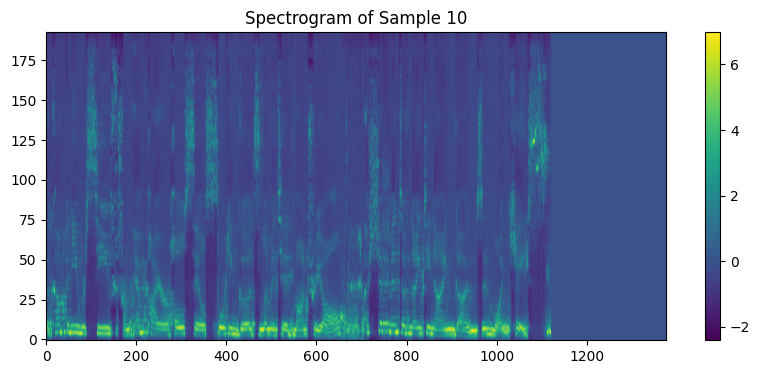

Decoded Label: the company received from empire wholesale sporting goods ltd montreal a shipment of ninetynine guns in one case


In [10]:
# Display one spectrogram
index = 10  # Change this to see different samples in the batch
plt.figure(figsize=(10, 4))
plt.imshow(spectrograms[index].T, aspect="auto", origin="lower")
plt.colorbar()
plt.title(f"Spectrogram of Sample {index}")
plt.show()

# Convert label back to text (if `num_to_char` function exists)
if "num_to_char" in globals():
    decoded_label = tf.strings.reduce_join(num_to_char(labels[index])).numpy().decode("utf-8")
    print("Decoded Label:", decoded_label)
else:
    print("Label (Numeric):", labels[index])

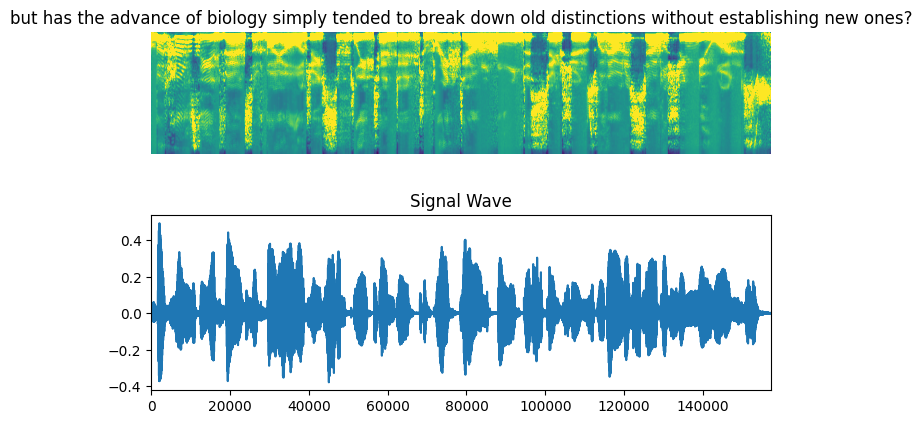

In [11]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    # Spectrogram
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")
    # Wav
    file = tf.io.read_file(wavs_path + list(df_train["file_name"])[0] + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

In [12]:
def CTCLoss(y_true, y_pred):
    # Compute the training-time loss value
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [13]:
def build_model(input_dim, output_dim, rnn_layers=5, rnn_units=128):
    """Model similar to DeepSpeech2."""
    # Model's input
    input_spectrogram = layers.Input((None, input_dim), name="input")
    # Expand the dimension to use 2D CNN.
    x = layers.Reshape((-1, input_dim, 1), name="expand_dim")(input_spectrogram)
    # Convolution layer 1
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 41],
        strides=[2, 2],
        padding="same",
        use_bias=False,
        name="conv_1",
    )(x)
    x = layers.BatchNormalization(name="conv_1_bn")(x)
    x = layers.ReLU(name="conv_1_relu")(x)
    # Convolution layer 2
    x = layers.Conv2D(
        filters=32,
        kernel_size=[11, 21],
        strides=[1, 2],
        padding="same",
        use_bias=False,
        name="conv_2",
    )(x)
    x = layers.BatchNormalization(name="conv_2_bn")(x)
    x = layers.ReLU(name="conv_2_relu")(x)
    # Reshape the resulted volume to feed the RNNs layers
    x = layers.Reshape((-1, x.shape[-2] * x.shape[-1]))(x)
    # RNN layers
    for i in range(1, rnn_layers + 1):
        recurrent = layers.GRU(
            units=rnn_units,
            activation="tanh",
            recurrent_activation="sigmoid",
            use_bias=True,
            return_sequences=True,
            reset_after=True,
            name=f"gru_{i}",
        )
        x = layers.Bidirectional(
            recurrent, name=f"bidirectional_{i}", merge_mode="concat"
        )(x)
        if i < rnn_layers:
            x = layers.Dropout(rate=0.5)(x)
    # Dense layer
    x = layers.Dense(units=rnn_units * 2, name="dense_1")(x)
    x = layers.ReLU(name="dense_1_relu")(x)
    x = layers.Dropout(rate=0.5)(x)
    # Classification layer
    output = layers.Dense(units=output_dim + 1, activation="softmax")(x)
    # Model
    model = keras.Model(input_spectrogram, output, name="DeepSpeech_2")
    # Optimizer
    opt = keras.optimizers.Adam(learning_rate=1e-4)
    # Compile the model and return
    model.compile(optimizer=opt, loss=CTCLoss)
    return model


# Get the model
model = build_model(
    input_dim=fft_length // 2 + 1,
    output_dim=char_to_num.vocabulary_size(),
    rnn_units=512,
)
model.summary(line_length=110)

Model: "DeepSpeech_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                   ┃ Output Shape                        ┃             Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                             │ (None, None, 193)                   │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ expand_dim (Reshape)                           │ (None, None, 193, 1)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1 (Conv2D)                                │ (None, None, 97, 32)                │              14,432 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_bn (BatchNormalization)                 │ (None, None, 97, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_1_relu (ReLU)                             │ (None, None, 97, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2 (Conv2D)                                │ (None, None, 49, 32)                │             236,544 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_bn (BatchNormalization)                 │ (None, None, 49, 32)                │                 128 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ conv_2_relu (ReLU)                             │ (None, None, 49, 32)                │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ reshape (Reshape)                              │ (None, None, 1568)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_1 (Bidirectional)                │ (None, None, 1024)                  │           6,395,904 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout (Dropout)                              │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_2 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_1 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_3 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_2 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ bidirectional_4 (Bidirectional)                │ (None, None, 1024)                  │           4,724,736 │
├────────────────────────────────────────────────┼─────────────────────────────────────┼─────────────────────┤
│ dropout_3 (Dropout)                            │ (None, None, 1024)                  │                   0 │
├───

 Total params: 26,628,480 (101.58 MB)

 Trainable params: 26,628,352 (101.58 MB)

 Non-trainable params: 128 (512.00 B)

In [14]:
# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0]
    # Iterate over the results and get back the text
    output_text = []
    for result in results:
        result = tf.strings.reduce_join(num_to_char(result)).numpy().decode("utf-8")
        output_text.append(result)
    return output_text


# A callback class to output a few transcriptions during training
class CallbackEval(keras.callbacks.Callback):
    """Displays a batch of outputs after every epoch."""

    def __init__(self, dataset):
        super().__init__()
        self.dataset = dataset

    def on_epoch_end(self, epoch: int, logs=None):
        predictions = []
        targets = []
        for batch in self.dataset:
            X, y = batch
            batch_predictions = model.predict(X)
            batch_predictions = decode_batch_predictions(batch_predictions)
            predictions.extend(batch_predictions)
            for label in y:
                label = (
                    tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
                )
                targets.append(label)
        wer_score = wer(targets, predictions)
        print("-" * 100)
        print(f"Word Error Rate: {wer_score:.4f}")
        print("-" * 100)
        for i in np.random.randint(0, len(predictions), 2):
            print(f"Target    : {targets[i]}")
            print(f"Prediction: {predictions[i]}")
            print("-" * 100)

In [ ]:
# Define the number of epochs.
epochs = 10
# Callback function to check transcription on the val set.
validation_callback = CallbackEval(validation_dataset)
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[validation_callback],
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepstep - loss: 368.876
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step


In [2]:
model.save("speechtotextmodel.h5")

NameError: name 'model' is not defined

In [18]:
# Let's check results on more validation samples
predictions = []
targets = []
for batch in validation_dataset:
    X, y = batch
    batch_predictions = model.predict(X)
    batch_predictions = decode_batch_predictions(batch_predictions)
    predictions.extend(batch_predictions)
    for label in y:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        targets.append(label)
wer_score = wer(targets, predictions)
print("-" * 100)
print(f"Word Error Rate: {wer_score:.4f}")
print("-" * 100)
for i in np.random.randint(0, len(predictions), 5):
    print(f"Target    : {targets[i]}")
    print(f"Prediction: {predictions[i]}")
    print("-" * 100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
import shutil

# Define file paths
model_path = "/kaggle/working/speechtotextmodel.h5"
zip_path = "/kaggle/working/speechtotextmodel.zip"

# Create a zip file
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', root_dir="/kaggle/working", base_dir="speechtotextmodel.h5")

# Print the zip file path
print(f"Download your model here: {zip_path}")


Download your model here: /kaggle/working/speechtotextmodel.zip


In [20]:
import shutil

# Define file paths
model_path = "/kaggle/working/speechtotextmodel.h5"
zip_path = "/kaggle/working/speechtotextmodel.zip"

# Zip the model file
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', root_dir="/kaggle/working", base_dir="speechtotextmodel.h5")

# Provide a download link
from IPython.display import FileLink

print("Click the link below to download the zipped model:")
FileLink(zip_path)


Click the link below to download the zipped model:


/kaggle/working/speechtotextmodel.zip

In [30]:
import os
import gtts
import tensorflow as tf
import numpy as np
import librosa
import soundfile as sf

# Install gtts if not installed
# !pip install gtts


In [ ]:
!pip install gtts

In [90]:
# Define text and filename
text = "hello"
filename = "/kaggle/working/test_audio2.wav"

# Convert text to speech
tts = gtts.gTTS(text, lang="en")

# Save the file
tts.save(filename)

print(f"Audio file '{filename}' has been generated successfully.")


Audio file '/kaggle/working/test_audio2.wav' has been generated successfully.


In [93]:
# Load the generated audio file
audio, sr = librosa.load(filename, sr=16000)  # Ensure sample rate is 16kHz
sf.write("/kaggle/working/test_audio2.wav", audio, sr)  # Save as WAV


In [48]:
import tensorflow as tf

# Define parameters
frame_length = 256
frame_step = 160
fft_length = 384

def encode_single_sample(wav_file, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read wav file
    file = tf.io.read_file(wav_file)
    # 2. Decode the wav file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. Normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    
    ###########################################
    ##  Process the Label
    ##########################################
    # 7. Convert label to lower case
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # 9. Map the characters in label to numbers
    label = char_to_num(label)
    
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label


In [94]:
spectrogram, encoded_label = encode_single_sample("/kaggle/working/test_audio2.wav", text)


In [95]:
encoded_label

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 8,  5, 12, 12, 15])>

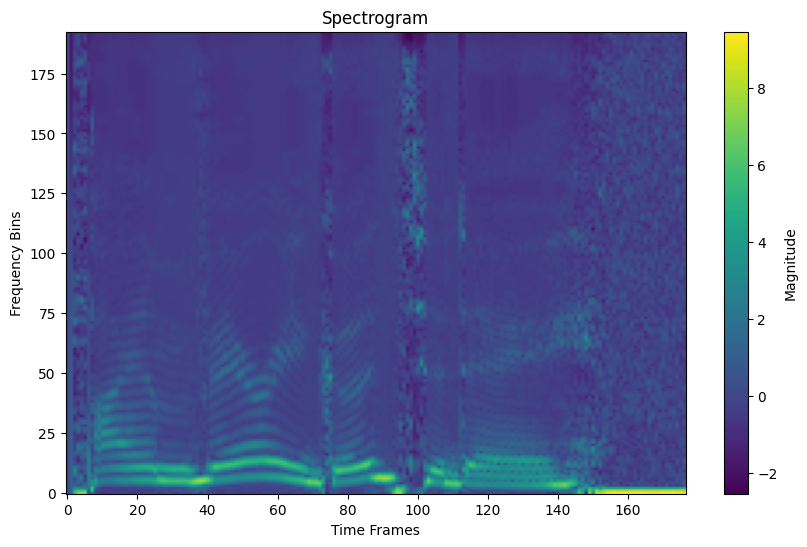

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt

def plot_spectrogram(spectrogram):
    """Plots the spectrogram."""
    plt.figure(figsize=(10, 6))
    plt.imshow(tf.transpose(spectrogram), aspect='auto', origin='lower', cmap='viridis')
    plt.colorbar(label="Magnitude")
    plt.xlabel("Time Frames")
    plt.ylabel("Frequency Bins")
    plt.title("Spectrogram")
    plt.show()

# Example usage
plot_spectrogram(spectrogram)


In [96]:
spectrogram = tf.expand_dims(spectrogram, axis=0)

In [77]:
spectrogram.shape

TensorShape([1, 1329, 193])

In [97]:
# Predict using the model
predictions = model.predict(spectrogram)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step


In [98]:

# Decode the predictions into text
decoded_text = decode_batch_predictions(predictions)



In [99]:
decoded_text[0]

''

In [86]:
from tensorflow.keras.models import load_model

# Define the CTCLoss function again
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

# Load model with custom objects
model = load_model("/kaggle/working/speechtotextmodel.h5", custom_objects={"CTCLoss": CTCLoss})

# Print model summary to verify loading
model.summary()


Model: "DeepSpeech_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, None, 193)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expand_dim (Reshape)                 │ (None, None, 193, 1)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1 (Conv2D)                      │ (None, None, 97, 32)        │          14,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1_bn (BatchNormalization)       │ (None, None, 97, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_1_relu (ReLU)                   │ (None, None, 97, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, None, 49, 32)        │         236,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2_bn (BatchNormalization)       │ (None, None, 49, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2_relu (ReLU)                   │ (None, None, 49, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, None, 1568)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, None, 1024)          │       6,395,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, None, 1024)          │       4,724,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, None, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, None, 1024)          │       4,724,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, None, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, None, 1024)          │       4,724,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, None, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, None, 1024)          │       4,724,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, None, 1024)          │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1_relu (ReLU)                  │ (None, None, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, None, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,628,482 (101.58 MB)

 Trainable params: 26,628,352 (101.58 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 2 (12.00 B)

In [87]:
# Predict using the model
predictions = model.predict(spectrogram)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 770ms/step


In [88]:

# Decode the predictions into text
decoded_text = decode_batch_predictions(predictions)



In [89]:
decoded_text[0]

'printing inm the oly sense with which we ar at present concerne difers fro most ife not from al the arts in crafs represented in the eiion'